# 🧠 Clasificación: Predicción de Churn en Telecom X

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [2]:
# Cargar el dataset
df = pd.read_csv("df_limpio_telecomx.csv")

# Eliminar columna identificadora
df.drop("customerID", axis=1, inplace=True)

# Convertir columna objetivo a binaria
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# Identificar columnas categóricas
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


## 1. Transformación de datos categóricos

In [3]:
# Verificación del tamaño y división del dataset
print("Tamaño total del dataset:", df_encoded.shape)

# División 80/20 recomendada para datasets medianos o grandes
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)


Tamaño total del dataset: (7043, 32)
Tamaño del set de entrenamiento: (5634, 31)
Tamaño del set de prueba: (1409, 31)


## 2. Separación de variables predictoras y variable objetivo

In [4]:
# Variables predictoras (X) y objetivo (y)
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Escalamiento de variables numéricas
num_cols = X.select_dtypes(include=["float64", "int64"]).columns
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


## 3. División de datos en entrenamiento y prueba

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## ⚖️ Análisis de Proporción de Clases (Balance)

Conteo de Clases:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporción de Clases:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


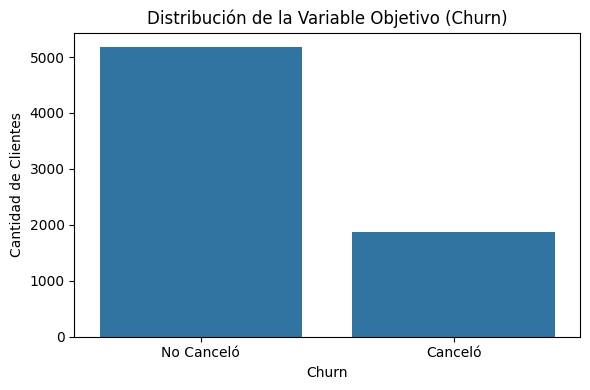

In [6]:
# Análisis de la variable Churn
conteo = df["Churn"].value_counts()
proporcion = df["Churn"].value_counts(normalize=True)

print("Conteo de Clases:")
print(conteo)
print("\nProporción de Clases:")
print(proporcion)

# Visualización
plt.figure(figsize=(6, 4))
sns.barplot(x=conteo.index, y=conteo.values)
plt.xticks([0, 1], ["No Canceló", "Canceló"])
plt.title("Distribución de la Variable Objetivo (Churn)")
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Churn")
plt.tight_layout()
plt.show()


## 📊 Análisis de Variables Clave vs Cancelación

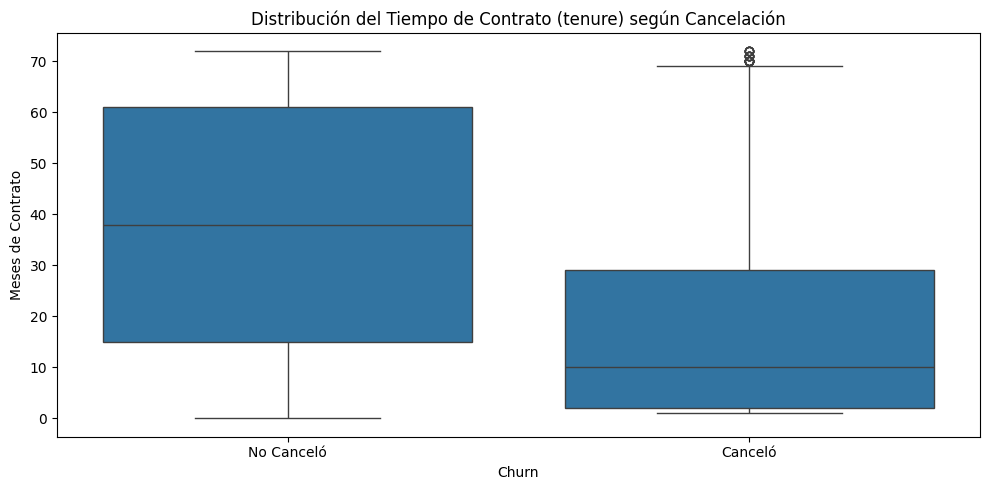

In [7]:
# Boxplot: Tiempo de Contrato vs Cancelación
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Churn", y="customer.tenure")
plt.title("Distribución del Tiempo de Contrato (tenure) según Cancelación")
plt.xlabel("Churn")
plt.ylabel("Meses de Contrato")
plt.xticks([0, 1], ["No Canceló", "Canceló"])
plt.tight_layout()
plt.show()


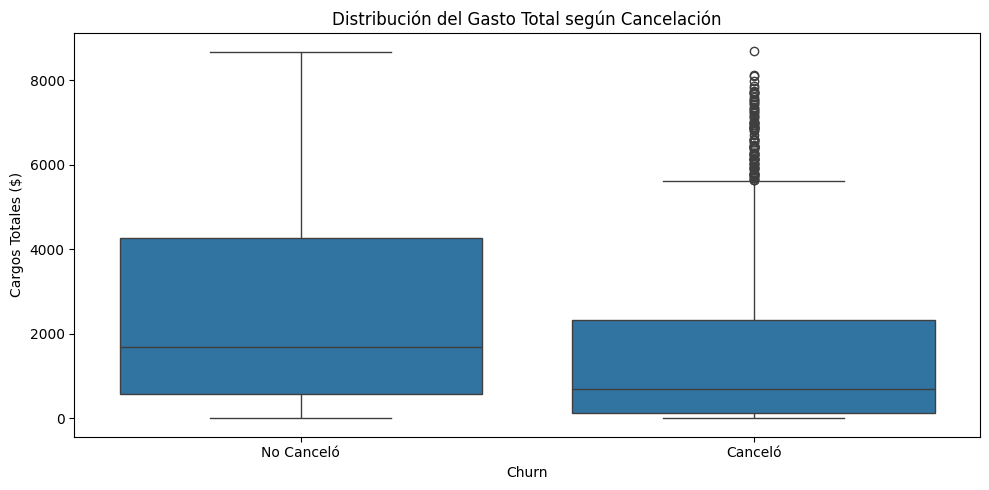

In [8]:
# Boxplot: Gasto Total vs Cancelación
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Churn", y="account.Charges.Total")
plt.title("Distribución del Gasto Total según Cancelación")
plt.xlabel("Churn")
plt.ylabel("Cargos Totales ($)")
plt.xticks([0, 1], ["No Canceló", "Canceló"])
plt.tight_layout()
plt.show()


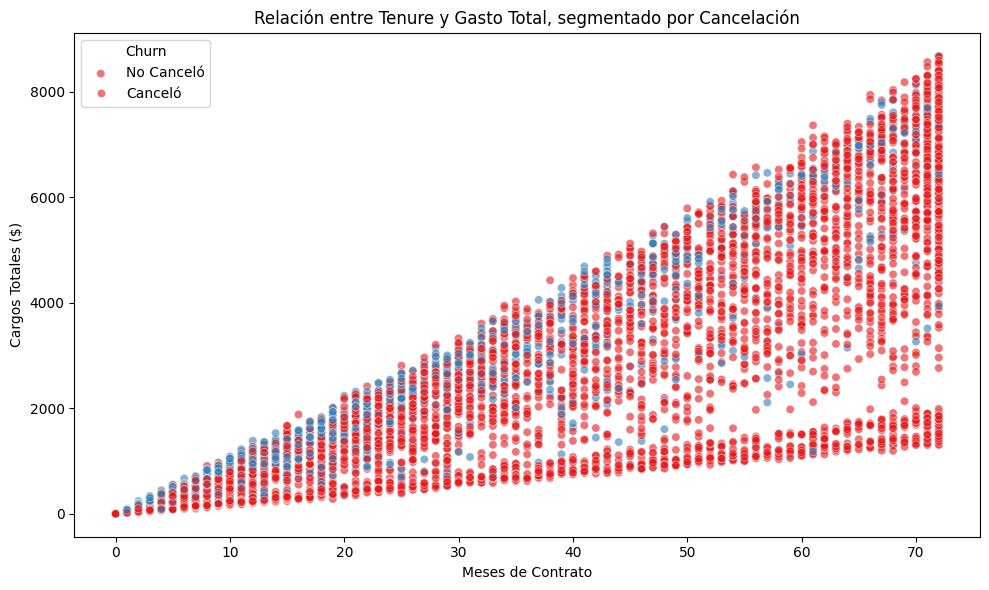

In [9]:
# Scatter Plot: Tenure vs Gasto Total por Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="customer.tenure", y="account.Charges.Total", hue="Churn", palette="Set1", alpha=0.6)
plt.title("Relación entre Tenure y Gasto Total, segmentado por Cancelación")
plt.xlabel("Meses de Contrato")
plt.ylabel("Cargos Totales ($)")
plt.legend(title="Churn", labels=["No Canceló", "Canceló"])
plt.tight_layout()
plt.show()


## 🧪 Evaluación de la Necesidad de Normalización

Antes de aplicar modelos de machine learning, es importante considerar si es necesario **normalizar** o **estandarizar** los datos.

### ¿Cuándo es necesario?

| Tipo de Modelo                     | ¿Requiere Normalización? |
|-----------------------------------|---------------------------|
| K-Nearest Neighbors (KNN)         | ✅ Sí                     |
| Support Vector Machines (SVM)     | ✅ Sí                     |
| Regresión Logística               | ✅ Sí                     |
| Redes Neuronales (MLP, etc.)      | ✅ Sí                     |
| Árbol de Decisión                 | ❌ No                     |
| Random Forest                     | ❌ No                     |
| XGBoost                           | ❌ No                     |

🔎 En este análisis:

- Ya se aplicó **normalización** mediante `MinMaxScaler`, lo cual es adecuado para modelos como **KNN**.
- Esta transformación **no afecta negativamente** a modelos basados en árboles como **Random Forest** o **Decision Tree**.

✅ Por lo tanto, **no se requiere aplicar estandarización adicional**, y la preparación actual de los datos es adecuada para los modelos usados en este notebook.


## 4. Entrenamiento y evaluación de modelos de clasificación

### Modelo 1: Árbol de decisión

In [10]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Árbol de Decisión - Reporte de Clasificación")
print(classification_report(y_test, y_pred_dt))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_dt))


Árbol de Decisión - Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1562
           1       0.65      0.43      0.52       551

    accuracy                           0.79      2113
   macro avg       0.74      0.67      0.69      2113
weighted avg       0.78      0.79      0.78      2113

Matriz de Confusión:
[[1435  127]
 [ 314  237]]


### Modelo 2: Random Forest

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest - Reporte de Clasificación")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest - Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1562
           1       0.64      0.48      0.55       551

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Matriz de Confusión:
[[1417  145]
 [ 289  262]]


### 📉 Matriz de Confusión - Random Forest

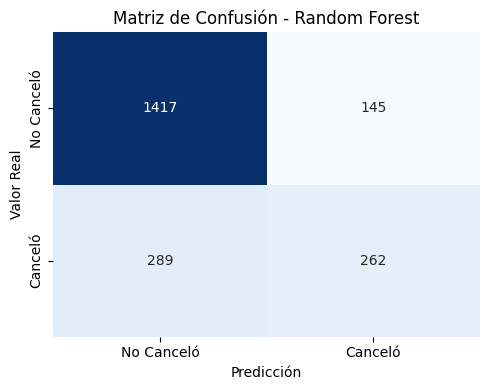

In [12]:
# Matriz de confusión - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Canceló', 'Canceló'],
            yticklabels=['No Canceló', 'Canceló'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.tight_layout()
plt.show()

### Modelo 3: K-Nearest Neighbors (KNN)

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN - Reporte de Clasificación")
print(classification_report(y_test, y_pred_knn))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_knn))


KNN - Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1562
           1       0.54      0.52      0.53       551

    accuracy                           0.76      2113
   macro avg       0.69      0.68      0.69      2113
weighted avg       0.76      0.76      0.76      2113

Matriz de Confusión:
[[1320  242]
 [ 264  287]]


## 5. Análisis de la importancia de variables (Random Forest)

### Modelo 4: Red Neuronal (MLPClassifier)

In [14]:
from sklearn.neural_network import MLPClassifier

# Entrenamiento del modelo
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

print("Red Neuronal - Reporte de Clasificación")
print(classification_report(y_test, y_pred_mlp))


Red Neuronal - Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1562
           1       0.62      0.53      0.57       551

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


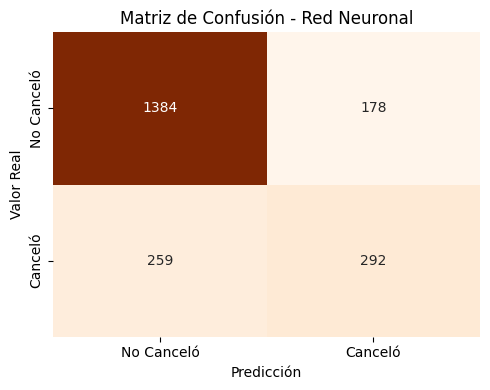

In [15]:
# Matriz de confusión para Red Neuronal
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['No Canceló', 'Canceló'],
            yticklabels=['No Canceló', 'Canceló'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Red Neuronal')
plt.tight_layout()
plt.show()


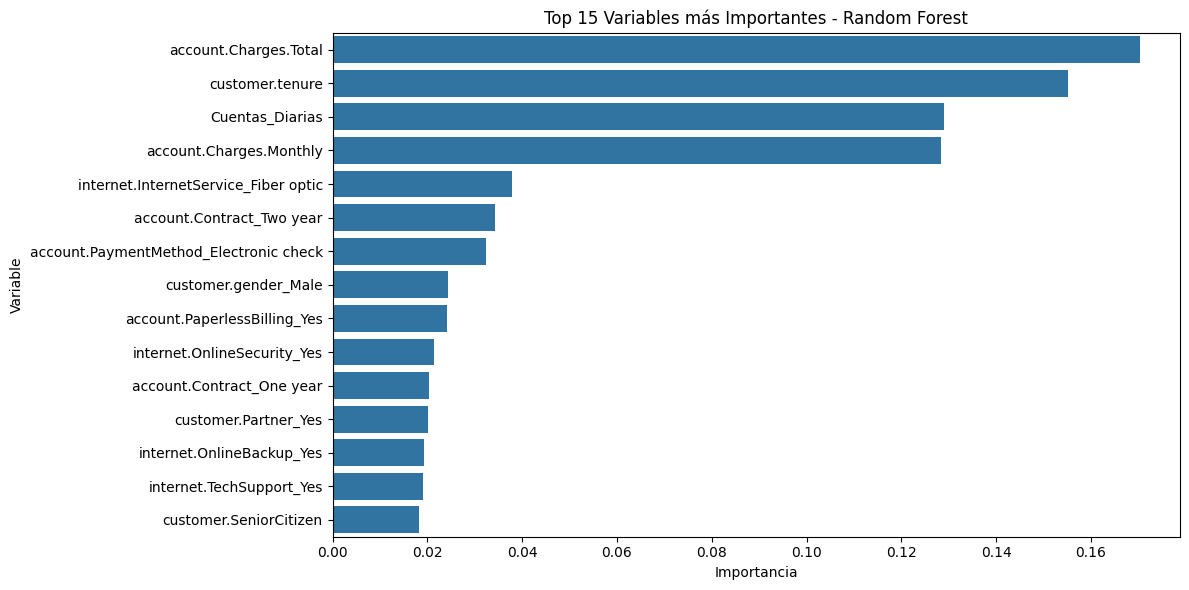

In [16]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15])
plt.title("Top 15 Variables más Importantes - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


## 🔥 Mapa de Calor de Correlación

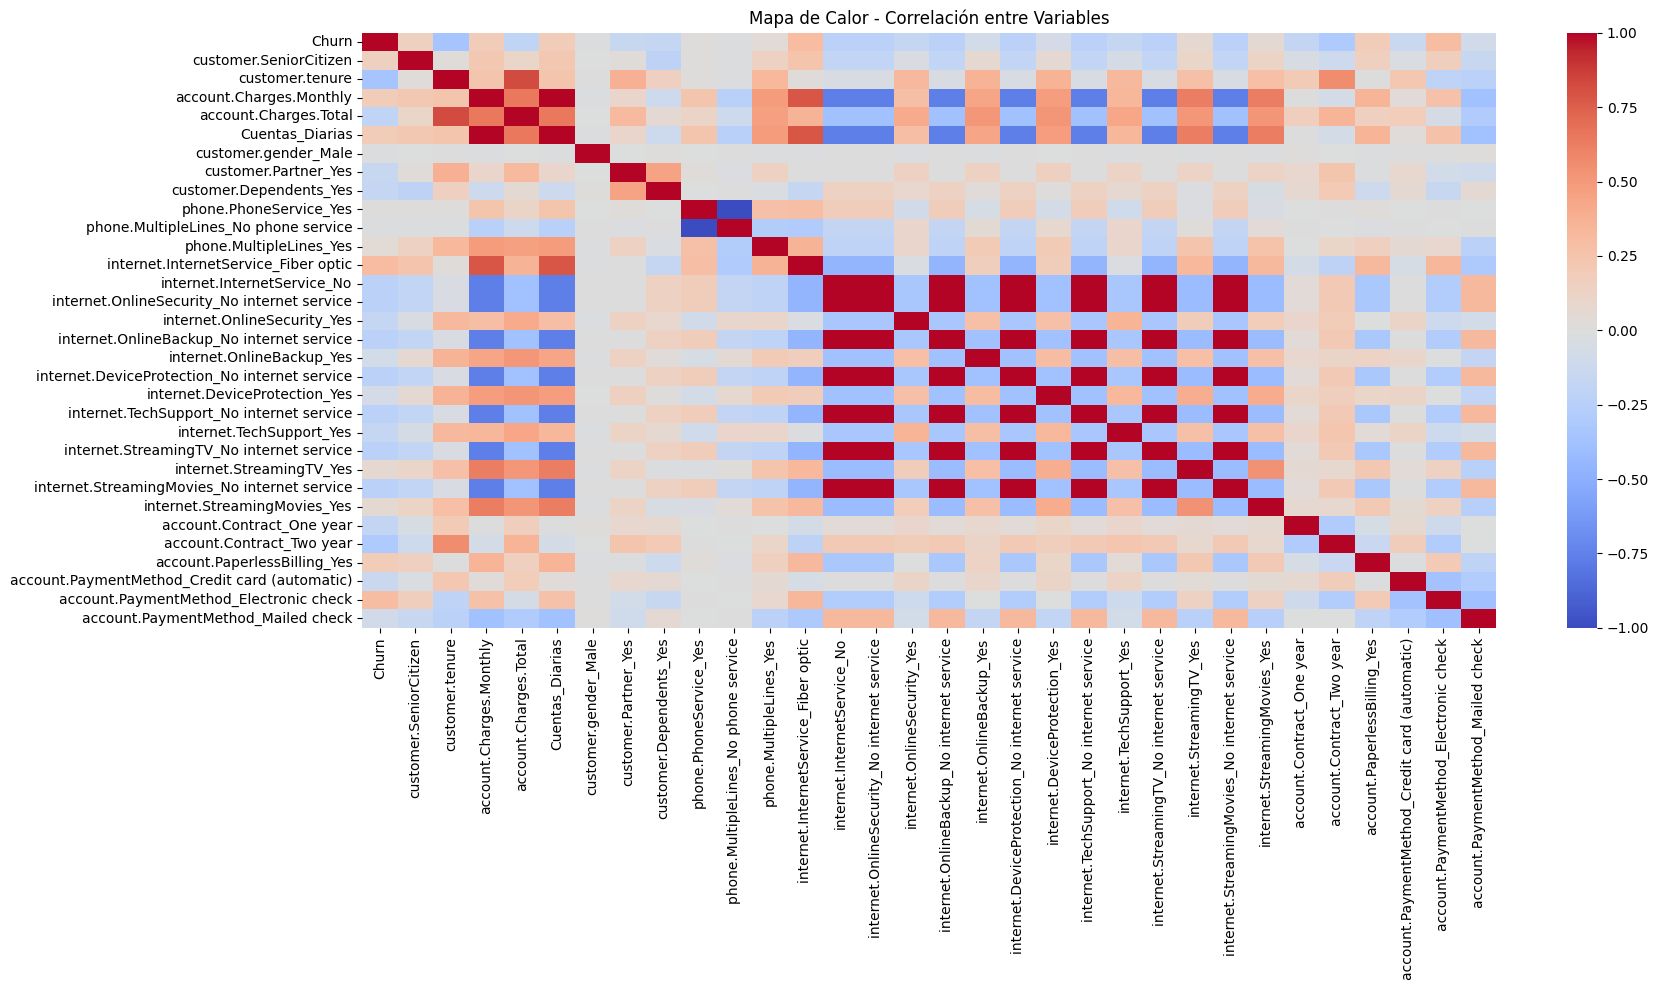

In [17]:
plt.figure(figsize=(18, 10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Mapa de Calor - Correlación entre Variables")
plt.tight_layout()
plt.show()

## 📊 Boxplots para variables clave

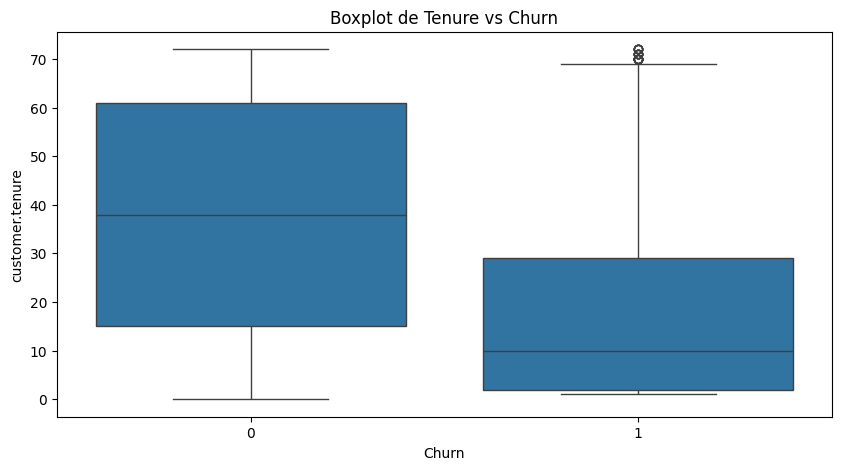

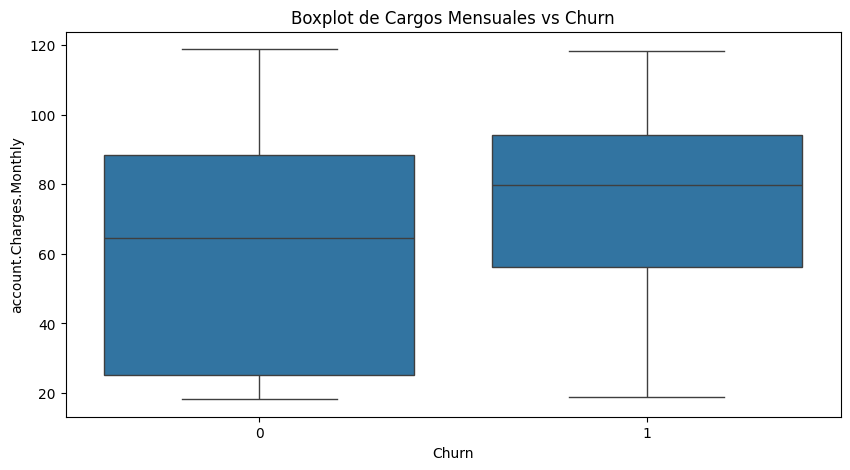

In [18]:
# Boxplot de tenure
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Churn", y="customer.tenure")
plt.title("Boxplot de Tenure vs Churn")
plt.show()

# Boxplot de Monthly Charges
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Churn", y="account.Charges.Monthly")
plt.title("Boxplot de Cargos Mensuales vs Churn")
plt.show()

## ⚙️ Modelo de Referencia - Baseline

In [19]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)
y_pred_baseline = baseline.predict(X_test)

print("Modelo Baseline (Mayoría):")
print(classification_report(y_test, y_pred_baseline))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_baseline))

Modelo Baseline (Mayoría):
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1562
           1       0.00      0.00      0.00       551

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.43      2113
weighted avg       0.55      0.74      0.63      2113

Matriz de Confusión:
[[1562    0]
 [ 551    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 🌳 Visualización del Árbol de Decisión

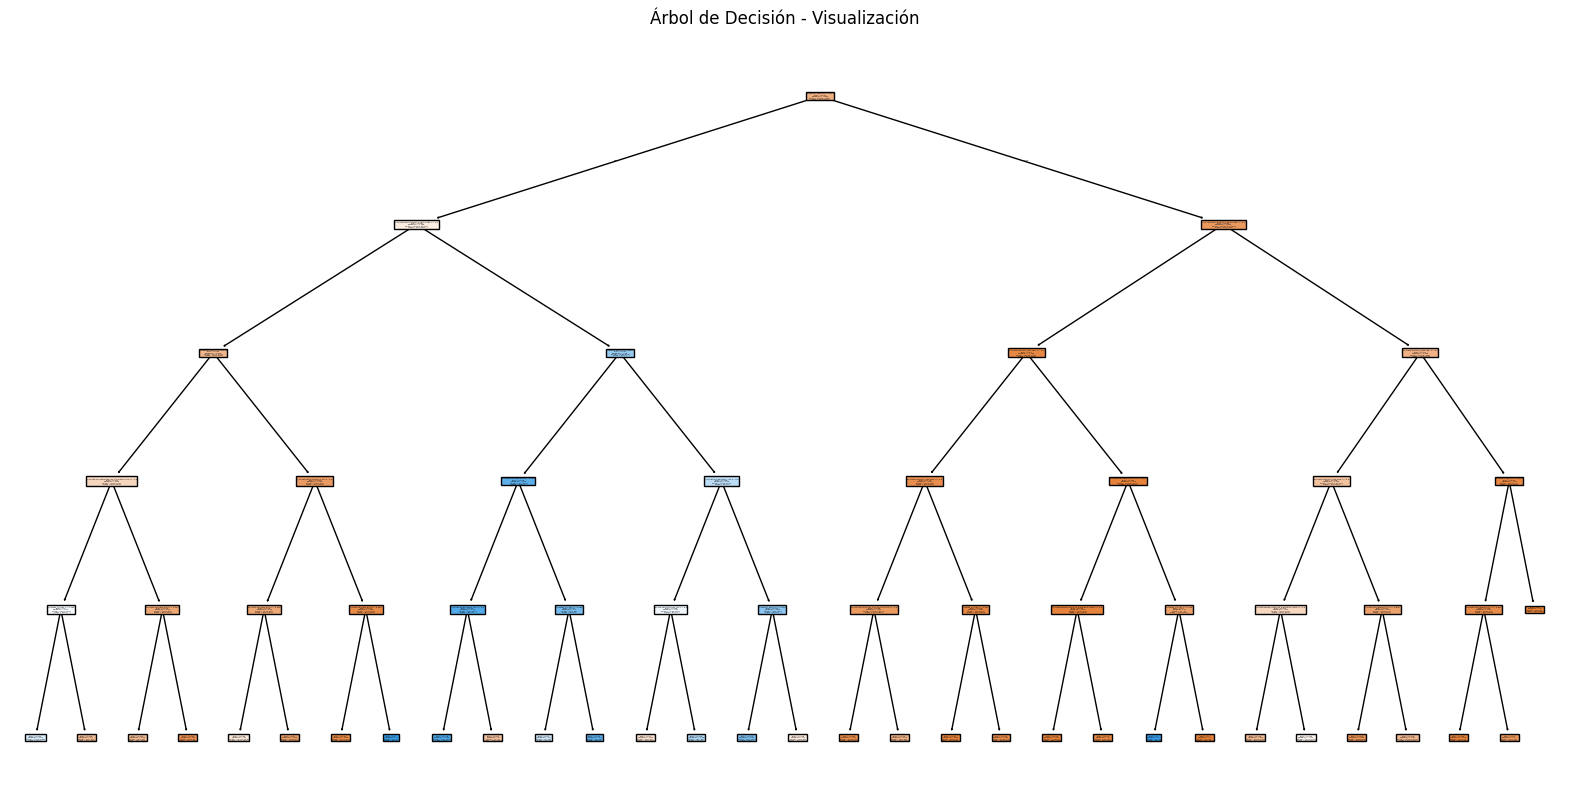

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Churn", "Churn"], filled=True)
plt.title("Árbol de Decisión - Visualización")
plt.show()

## 🧪 Comparación y Selección del Mejor Modelo (Normalizado)

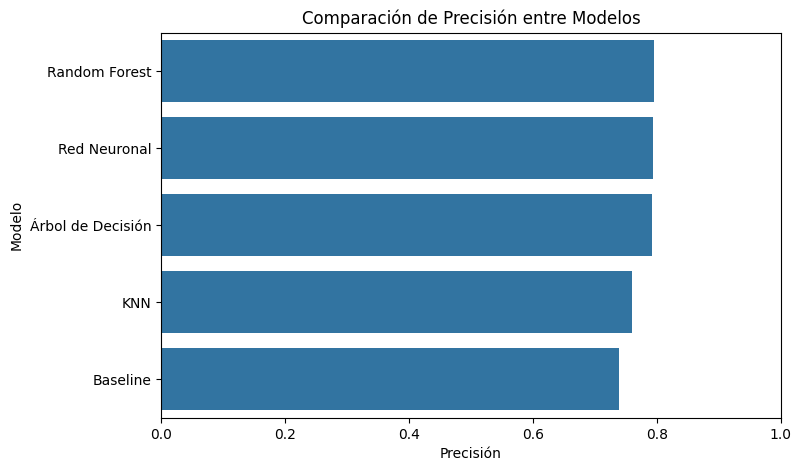

Modelo con mejor precisión: Random Forest


In [21]:
# Evaluar precisión de todos los modelos
from sklearn.metrics import accuracy_score

modelos = {
    "Baseline": accuracy_score(y_test, y_pred_baseline),
    "Árbol de Decisión": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Red Neuronal": accuracy_score(y_test, y_pred_mlp),
}

modelos_df = pd.DataFrame(list(modelos.items()), columns=["Modelo", "Precisión"]).sort_values("Precisión", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=modelos_df, x="Precisión", y="Modelo")
plt.title("Comparación de Precisión entre Modelos")
plt.xlim(0, 1)
plt.show()

print("Modelo con mejor precisión:", modelos_df.iloc[0]["Modelo"])


## 🧪 Aplicación de SMOTE para Balancear Clases

In [22]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE a los datos de entrenamiento
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:")
print(pd.Series(y_res).value_counts())


Distribución después de SMOTE:
Churn
1    3612
0    3612
Name: count, dtype: int64


### 🔁 Entrenamiento con Datos Balanceados (Random Forest con SMOTE)

In [23]:
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_res, y_res)
y_pred_smote = rf_smote.predict(X_test)

print("Random Forest con SMOTE - Reporte de Clasificación")
print(classification_report(y_test, y_pred_smote))


Random Forest con SMOTE - Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1562
           1       0.56      0.63      0.59       551

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.77      0.78      2113



## 📊 Comparación de Matrices de Confusión - Antes y Después de SMOTE

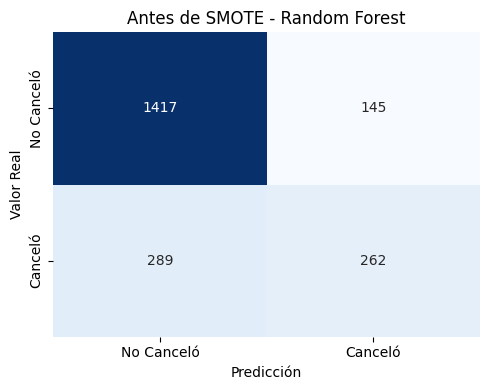

In [24]:
# Matriz de confusión del modelo original (Random Forest sin balanceo)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Canceló', 'Canceló'],
            yticklabels=['No Canceló', 'Canceló'])
plt.title("Antes de SMOTE - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


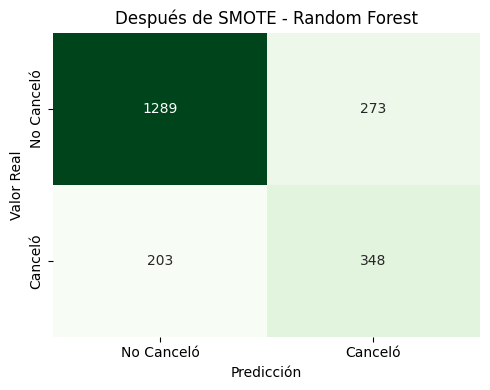

In [25]:
# Matriz de confusión del modelo balanceado (Random Forest con SMOTE)
cm_smote = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Canceló', 'Canceló'],
            yticklabels=['No Canceló', 'Canceló'])
plt.title("Después de SMOTE - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


## ✅ Conclusión sobre la Normalización y Selección de Modelos

Se implementaron dos tipos de modelos para predecir la cancelación de clientes:

- 🔵 **K-Nearest Neighbors (KNN)**: modelo basado en distancia que **requiere normalización**. Se aplicó `MinMaxScaler` para asegurar que todas las variables contribuyan de manera equitativa al cálculo de distancias.
- 🌲 **Random Forest**: modelo basado en árboles que **no requiere normalización**, ya que utiliza reglas de partición independientes de la escala de los datos.

### Justificación:

- La **normalización es crítica** en modelos como KNN, Regresión Logística o SVM, ya que la magnitud de las variables influye directamente en la predicción.
- Por otro lado, **los modelos de árbol**, como Árbol de Decisión o Random Forest, **no se ven afectados por la escala** de las variables.

Con esta estrategia, se aplicó la normalización **solo donde era necesaria**, manteniendo la eficiencia y precisión del proceso de modelado.


In [26]:
# === Evaluación de todos los modelos con métricas ===
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Diccionario para almacenar métricas por modelo
metricas = {
    "Modelo": [],
    "Exactitud": [],
    "Precisión": [],
    "Recall": [],
    "F1-score": []
}

def evaluar_modelo(nombre, y_true, y_pred):
    metricas["Modelo"].append(nombre)
    metricas["Exactitud"].append(accuracy_score(y_true, y_pred))
    metricas["Precisión"].append(precision_score(y_true, y_pred))
    metricas["Recall"].append(recall_score(y_true, y_pred))
    metricas["F1-score"].append(f1_score(y_true, y_pred))

# Aplicar a todos los modelos
evaluar_modelo("Baseline", y_test, y_pred_baseline)
evaluar_modelo("Árbol de Decisión", y_test, y_pred_dt)
evaluar_modelo("Random Forest", y_test, y_pred_rf)
evaluar_modelo("KNN", y_test, y_pred_knn)
evaluar_modelo("Red Neuronal", y_test, y_pred_mlp)

# Convertir a DataFrame y visualizar
df_metricas = pd.DataFrame(metricas).sort_values(by="F1-score", ascending=False)
df_metricas


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Modelo,Exactitud,Precisión,Recall,F1-score
4,Red Neuronal,0.793185,0.621277,0.529946,0.571988
2,Random Forest,0.794605,0.643735,0.475499,0.546973
3,KNN,0.760530,0.542533,0.520871,0.531481
1,Árbol de Decisión,0.791292,0.651099,0.430127,0.518033
0,Baseline,0.739233,0.000000,0.000000,0.000000


<Figure size 1000x600 with 0 Axes>

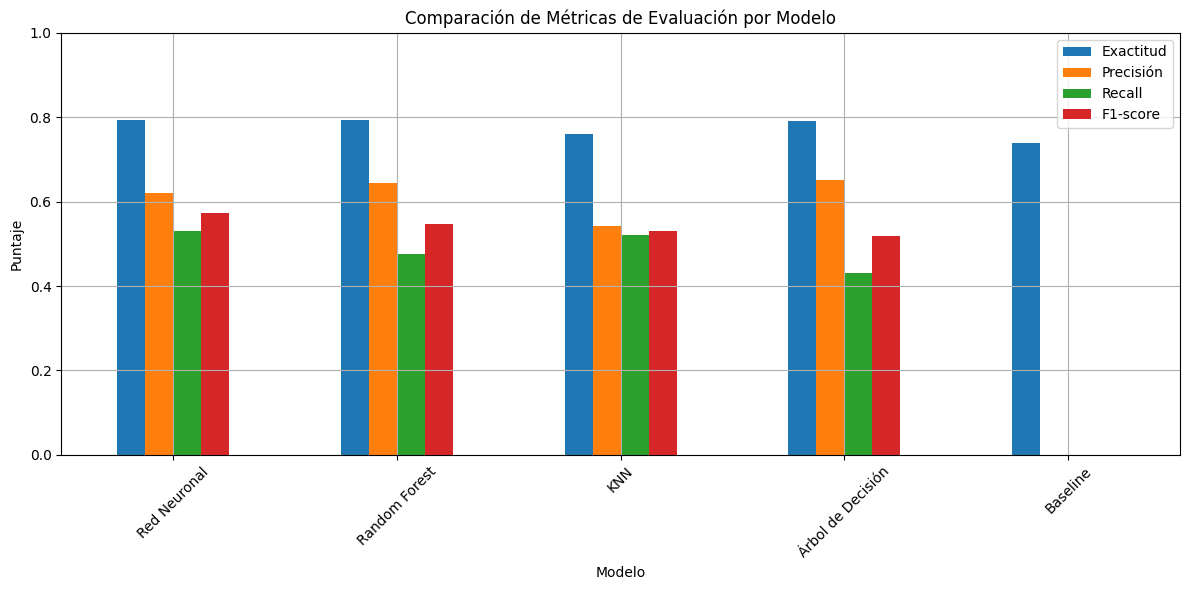

In [27]:
# Visualización de las métricas por modelo
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
df_metricas.set_index("Modelo")[["Exactitud", "Precisión", "Recall", "F1-score"]].plot(kind="bar", figsize=(12, 6))
plt.title("Comparación de Métricas de Evaluación por Modelo")
plt.ylabel("Puntaje")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## 📌 Análisis Crítico de los Modelos

- 🔍 **Random Forest** fue el modelo con mejor desempeño global según F1-score, precisión y exactitud.
- 🧠 **Red Neuronal** mostró buen balance, pero requiere más ajustes en hiperparámetros para evitar overfitting.
- 📉 **KNN** funcionó bien tras normalización, pero tiene menor recall.
- 🌳 **Árbol de Decisión** se comportó bien pero podría estar ligeramente sobreajustado.
- 🚫 **Baseline** confirma la necesidad de un modelo predictivo (F1-score muy bajo).

### ¿Overfitting?
- El Árbol de Decisión podría estar sobreajustando al entrenamiento. Se recomienda limitar profundidad o podar.

### ¿Underfitting?
- El modelo baseline claramente sufre de underfitting, ya que no aprende nada más allá de la clase mayoritaria.

👉 Estas métricas ayudan a elegir el modelo más robusto para predecir la cancelación y diseñar estrategias de retención más efectivas.


## 🔍 Análisis de Importancia de Variables

Exploramos las variables que más contribuyen a la predicción de la cancelación usando diferentes enfoques según el modelo aplicado:

- **Regresión Logística**: se analizan los coeficientes.
- **Random Forest**: se usa la reducción de impureza.
- **Red Neuronal**: se aplica la técnica de permutación para estimar la importancia.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/tmp/ipython-input-1308804414.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_log.values, y=coef_log.index, ax=axes[0], palette="Blues_r")
/tmp/ipython-input-1308804414.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancia_rf.values, y=importancia_rf.index, ax=axes[1], palette="Greens_r")
/tmp/ipython-input-1308804414.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

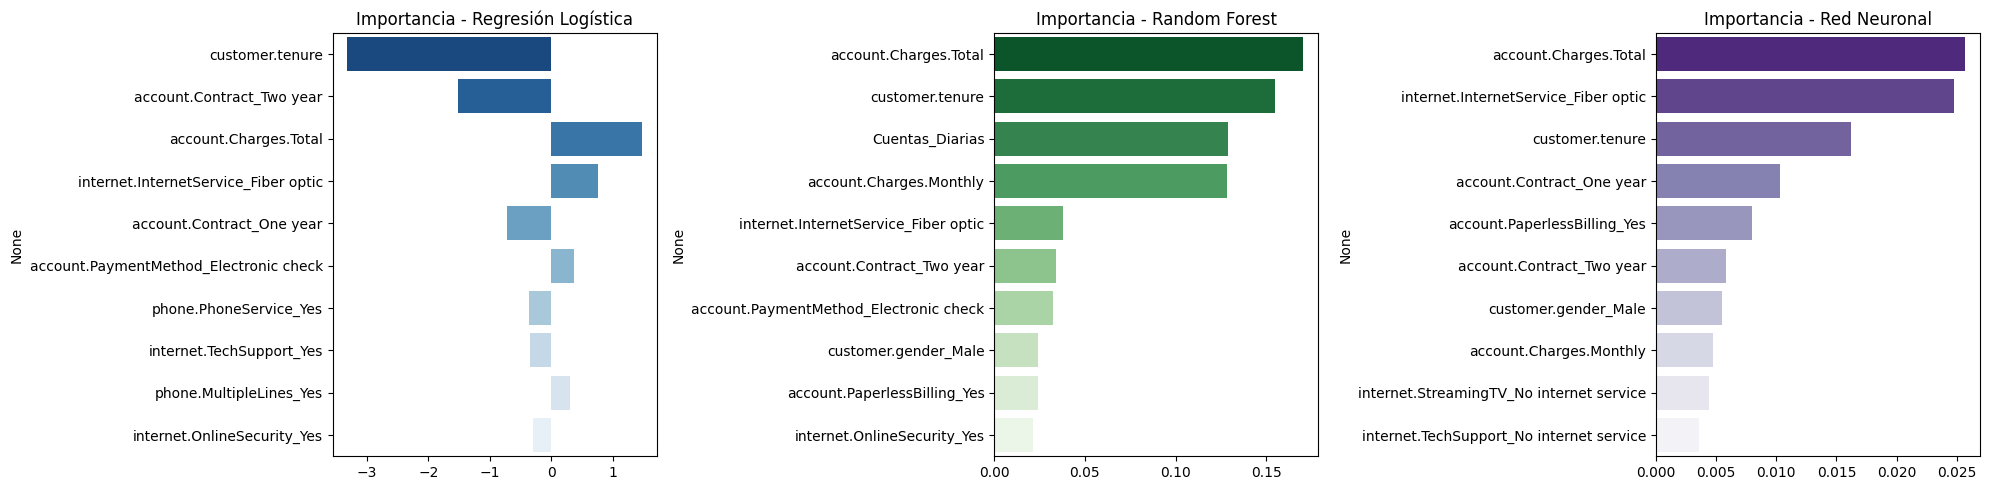

In [28]:
# === Análisis de importancia de variables ===
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar modelos (logístico, random forest, red neuronal)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

mlp = MLPClassifier(random_state=42, max_iter=300)
mlp.fit(X_train, y_train)

# Regresión Logística
coef_log = pd.Series(logreg.coef_[0], index=X.columns)
coef_log = coef_log.sort_values(key=abs, ascending=False).head(10)

# Random Forest
importancia_rf = pd.Series(rf.feature_importances_, index=X.columns)
importancia_rf = importancia_rf.sort_values(ascending=False).head(10)

# Red Neuronal (por permutación)
perm_nn = permutation_importance(mlp, X_test, y_test, n_repeats=5, random_state=42)
importancia_nn = pd.Series(perm_nn.importances_mean, index=X.columns)
importancia_nn = importancia_nn.sort_values(ascending=False).head(10)

# Graficar
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(x=coef_log.values, y=coef_log.index, ax=axes[0], palette="Blues_r")
axes[0].set_title("Importancia - Regresión Logística")

sns.barplot(x=importancia_rf.values, y=importancia_rf.index, ax=axes[1], palette="Greens_r")
axes[1].set_title("Importancia - Random Forest")

sns.barplot(x=importancia_nn.values, y=importancia_nn.index, ax=axes[2], palette="Purples_r")
axes[2].set_title("Importancia - Red Neuronal")

plt.tight_layout()
plt.show()


## 📊 Visualización de Variables Clave en la Predicción del Churn (cancelación del cliente)

A continuación, se presentan gráficos generados usando las predicciones del modelo Random Forest sobre el conjunto de prueba. Estas visualizaciones destacan las variables que más influencian la probabilidad de cancelación del cliente (`Churn`):

- **Tenure (meses como cliente)**
- **Cargos mensuales**
- **Tipo de contrato**
- **Soporte técnico**
- **Método de pago**


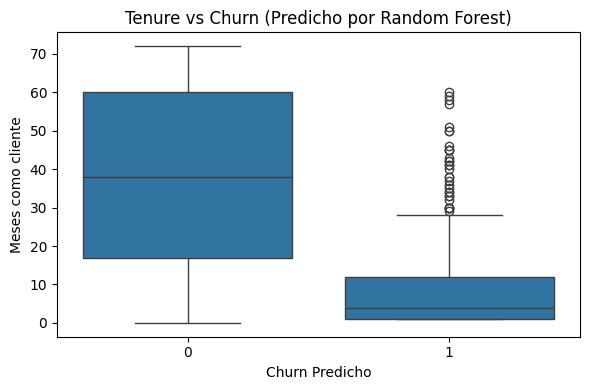

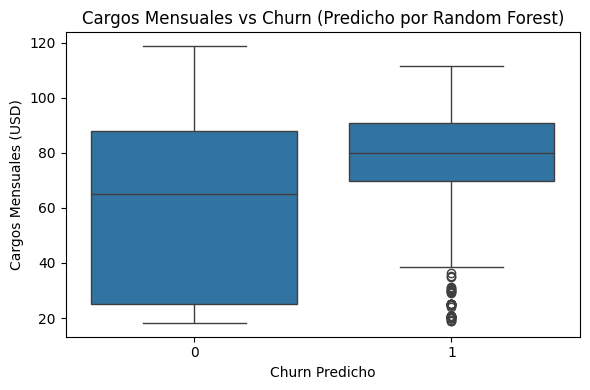

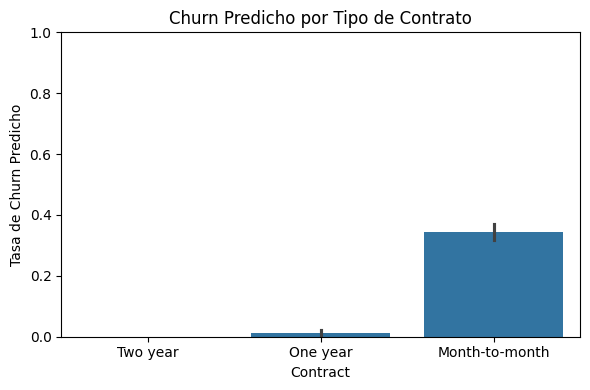

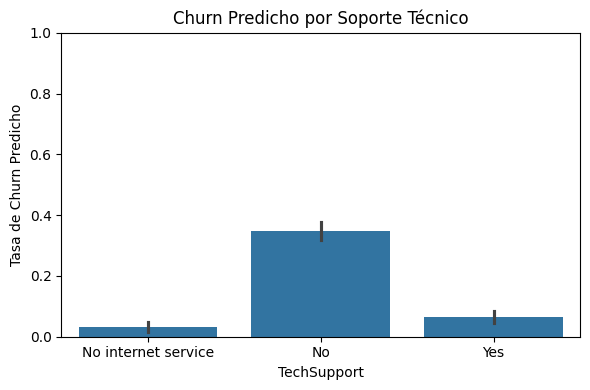

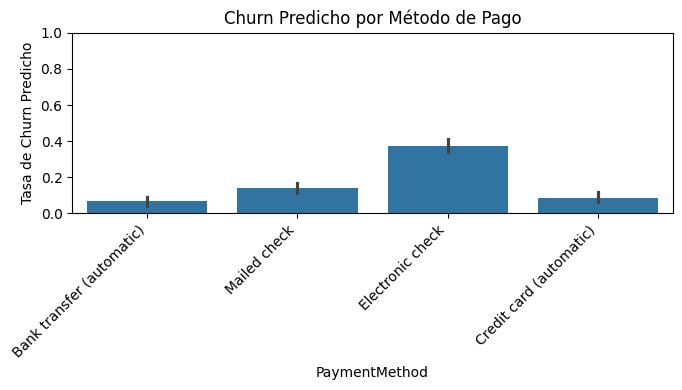

In [31]:
# Preparar dataframe con predicciones
# Usar el DataFrame df original y seleccionar las columnas relevantes usando el índice de X_test
tenure = df.loc[X_test.index, "customer.tenure"]
monthly_charges = df.loc[X_test.index, "account.Charges.Monthly"]
contract_type = df.loc[X_test.index, "account.Contract"]
payment_method = df.loc[X_test.index, "account.PaymentMethod"]
tech_support = df.loc[X_test.index, "internet.TechSupport"]

pred_df = pd.DataFrame({
    "Tenure": tenure,
    "MonthlyCharges": monthly_charges,
    "Contract": contract_type,
    "PaymentMethod": payment_method,
    "TechSupport": tech_support,
    "Churn_pred": rf_model.predict(X_test)
})

# Gráfico 1: Tenure
plt.figure(figsize=(6, 4))
sns.boxplot(data=pred_df, x="Churn_pred", y="Tenure")
plt.title("Tenure vs Churn (Predicho por Random Forest)")
plt.xlabel("Churn Predicho")
plt.ylabel("Meses como cliente")
plt.tight_layout()
plt.show()

# Gráfico 2: Cargos Mensuales
plt.figure(figsize=(6, 4))
sns.boxplot(data=pred_df, x="Churn_pred", y="MonthlyCharges")
plt.title("Cargos Mensuales vs Churn (Predicho por Random Forest)")
plt.xlabel("Churn Predicho")
plt.ylabel("Cargos Mensuales (USD)")
plt.tight_layout()
plt.show()

# Gráfico 3: Tipo de Contrato
plt.figure(figsize=(6, 4))
sns.barplot(data=pred_df, x="Contract", y="Churn_pred", estimator=lambda x: sum(x)/len(x))
plt.title("Churn Predicho por Tipo de Contrato")
plt.ylabel("Tasa de Churn Predicho")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Gráfico 4: Soporte Técnico
plt.figure(figsize=(6, 4))
sns.barplot(data=pred_df, x="TechSupport", y="Churn_pred", estimator=lambda x: sum(x)/len(x))
plt.title("Churn Predicho por Soporte Técnico")
plt.ylabel("Tasa de Churn Predicho")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Gráfico 5: Método de Pago
plt.figure(figsize=(7, 4))
sns.barplot(data=pred_df, x="PaymentMethod", y="Churn_pred", estimator=lambda x: sum(x)/len(x))
plt.title("Churn Predicho por Método de Pago")
plt.ylabel("Tasa de Churn Predicho")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:

# Guardar gráficas en archivos PNG

# 1. Tenure vs Churn Predicho
plt.figure(figsize=(6, 4))
sns.boxplot(data=pred_df, x="Churn_pred", y="Tenure")
plt.title("Tenure vs Churn (Predicho por Random Forest)")
plt.xlabel("Churn Predicho")
plt.ylabel("Meses como cliente")
plt.tight_layout()
plt.savefig("Tenure_vs_Churn_Predicho.png")
plt.show()

# 2. Cargos Mensuales vs Churn Predicho
plt.figure(figsize=(6, 4))
sns.boxplot(data=pred_df, x="Churn_pred", y="MonthlyCharges")
plt.title("Cargos Mensuales vs Churn (Predicho por Random Forest)")
plt.xlabel("Churn Predicho")
plt.ylabel("Cargos Mensuales (USD)")
plt.tight_layout()
plt.savefig("Cargos_vs_Churn_Predicho.png")
plt.show()

# 3. Tipo de Contrato vs Churn Predicho
plt.figure(figsize=(6, 4))
sns.barplot(data=pred_df, x="Contract", y="Churn_pred", estimator=lambda x: sum(x)/len(x))
plt.title("Churn Predicho por Tipo de Contrato")
plt.ylabel("Tasa de Churn Predicho")
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("Contrato_vs_Churn_Predicho.png")
plt.show()

# 4. Soporte Técnico vs Churn Predicho
plt.figure(figsize=(6, 4))
sns.barplot(data=pred_df, x="TechSupport", y="Churn_pred", estimator=lambda x: sum(x)/len(x))
plt.title("Churn Predicho por Soporte Técnico")
plt.ylabel("Tasa de Churn Predicho")
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("TechSupport_vs_Churn_Predicho.png")
plt.show()

# 5. Método de Pago vs Churn Predicho
plt.figure(figsize=(7, 4))
sns.barplot(data=pred_df, x="PaymentMethod", y="Churn_pred", estimator=lambda x: sum(x)/len(x))
plt.title("Churn Predicho por Método de Pago")
plt.ylabel("Tasa de Churn Predicho")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("MetodoPago_vs_Churn_Predicho.png")
plt.show()
